In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 256
epochs = 200
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.4),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.4),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.3)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.3)
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.3)
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

# scheduler_g = torch.optim.lr_scheduler.StepLR(optim_g, step_size=20, gamma=0.3)
# scheduler_d = torch.optim.lr_scheduler.StepLR(optim_d, step_size=20, gamma=0.3)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  0%|          | 0/234 [00:00<?, ?it/s]

235it [00:10, 22.69it/s]                         


Epoch 1 of 200
Generator loss: 3.69692725, Discriminator loss: 0.90457269


235it [00:10, 22.00it/s]                         


Epoch 2 of 200
Generator loss: 6.83992769, Discriminator loss: 0.29457668


235it [00:10, 21.43it/s]                         


Epoch 3 of 200
Generator loss: 5.51978985, Discriminator loss: 0.58930943


235it [00:10, 21.85it/s]                         


Epoch 4 of 200
Generator loss: 3.41022828, Discriminator loss: 0.86317179


235it [00:11, 21.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


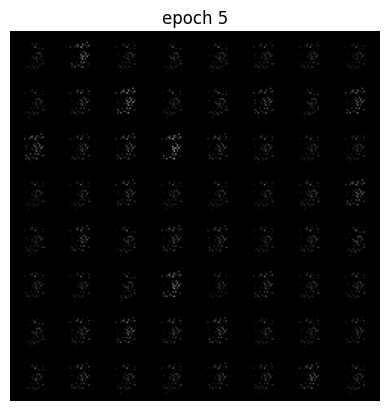

Epoch 5 of 200
Generator loss: 2.25064585, Discriminator loss: 0.96119310


235it [00:10, 21.48it/s]                         


Epoch 6 of 200
Generator loss: 2.97992073, Discriminator loss: 0.93504642


235it [00:10, 22.22it/s]                         


Epoch 7 of 200
Generator loss: 3.26200363, Discriminator loss: 0.90966283


235it [00:10, 21.75it/s]                         


Epoch 8 of 200
Generator loss: 1.58333441, Discriminator loss: 1.22118107


235it [00:10, 22.00it/s]                         


Epoch 9 of 200
Generator loss: 1.06625215, Discriminator loss: 1.19831218


235it [00:10, 21.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


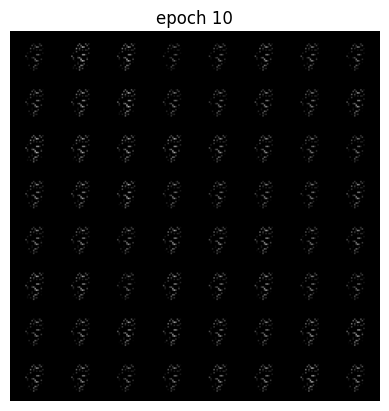

Epoch 10 of 200
Generator loss: 1.65088684, Discriminator loss: 1.12551674


235it [00:11, 21.35it/s]                         


Epoch 11 of 200
Generator loss: 2.24094051, Discriminator loss: 1.16343032


235it [00:10, 21.92it/s]                         


Epoch 12 of 200
Generator loss: 2.03889559, Discriminator loss: 1.05920667


235it [00:10, 21.87it/s]                         


Epoch 13 of 200
Generator loss: 1.93889250, Discriminator loss: 1.06062715


235it [00:11, 20.90it/s]                         


Epoch 14 of 200
Generator loss: 2.32524180, Discriminator loss: 0.96478127


235it [00:10, 22.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


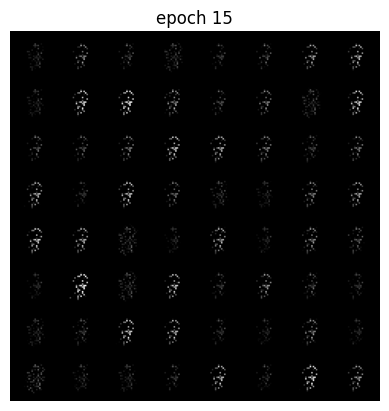

Epoch 15 of 200
Generator loss: 2.16877331, Discriminator loss: 1.05038621


235it [00:10, 21.98it/s]                         


Epoch 16 of 200
Generator loss: 2.67288836, Discriminator loss: 0.93313260


235it [00:10, 21.51it/s]                         


Epoch 17 of 200
Generator loss: 1.70453975, Discriminator loss: 1.03259416


235it [00:10, 21.77it/s]                         


Epoch 18 of 200
Generator loss: 1.96490046, Discriminator loss: 0.89885962


235it [00:10, 22.33it/s]                         


Epoch 19 of 200
Generator loss: 2.14870963, Discriminator loss: 0.94189139


235it [00:10, 22.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


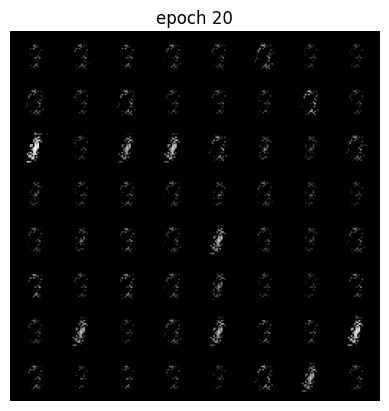

Epoch 20 of 200
Generator loss: 2.14433813, Discriminator loss: 0.81334711


235it [00:10, 21.77it/s]                         


Epoch 21 of 200
Generator loss: 2.08288256, Discriminator loss: 0.70617296


235it [00:10, 21.48it/s]                         


Epoch 22 of 200
Generator loss: 2.01086004, Discriminator loss: 0.79540157


235it [00:10, 21.77it/s]                         


Epoch 23 of 200
Generator loss: 1.74656223, Discriminator loss: 0.71860874


235it [00:10, 22.13it/s]                         


Epoch 24 of 200
Generator loss: 2.16127288, Discriminator loss: 0.69966970


235it [00:10, 22.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


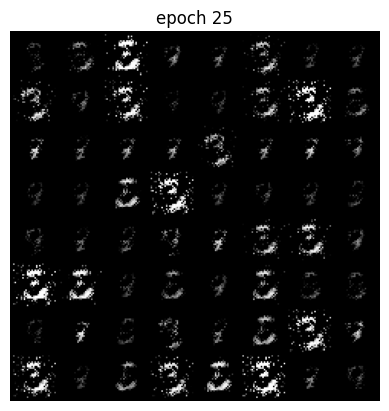

Epoch 25 of 200
Generator loss: 1.92691301, Discriminator loss: 0.74777966


235it [00:10, 22.20it/s]                         


Epoch 26 of 200
Generator loss: 1.51483929, Discriminator loss: 0.98476240


235it [00:10, 21.71it/s]                         


Epoch 27 of 200
Generator loss: 1.75517576, Discriminator loss: 0.85045496


235it [00:10, 21.98it/s]                         


Epoch 28 of 200
Generator loss: 1.95605601, Discriminator loss: 0.82898782


235it [00:10, 21.66it/s]                         


Epoch 29 of 200
Generator loss: 1.90162000, Discriminator loss: 0.85448876


235it [00:10, 21.86it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


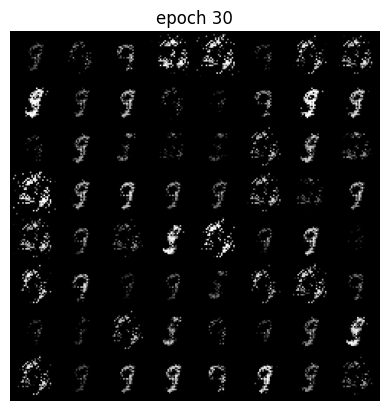

Epoch 30 of 200
Generator loss: 1.61846444, Discriminator loss: 0.95672008


235it [00:10, 21.62it/s]                         


Epoch 31 of 200
Generator loss: 1.49496358, Discriminator loss: 0.91210075


235it [00:10, 21.47it/s]                         


Epoch 32 of 200
Generator loss: 1.90103376, Discriminator loss: 0.84956727


235it [00:10, 21.76it/s]                         


Epoch 33 of 200
Generator loss: 1.90199352, Discriminator loss: 0.81352396


235it [00:10, 21.41it/s]                         


Epoch 34 of 200
Generator loss: 2.33111092, Discriminator loss: 0.89960350


235it [00:10, 21.43it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


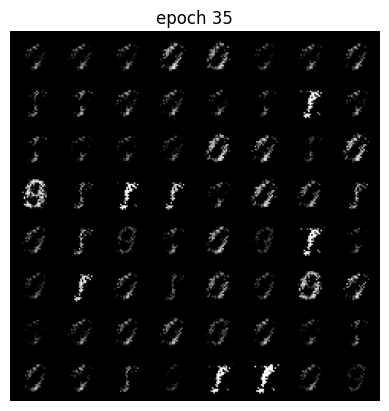

Epoch 35 of 200
Generator loss: 1.77629658, Discriminator loss: 1.02314855


235it [00:11, 21.29it/s]                         


Epoch 36 of 200
Generator loss: 2.07589503, Discriminator loss: 0.80059779


235it [00:10, 21.73it/s]                         


Epoch 37 of 200
Generator loss: 2.02485738, Discriminator loss: 0.93962274


235it [00:10, 21.92it/s]                         


Epoch 38 of 200
Generator loss: 1.98536100, Discriminator loss: 0.88216945


235it [00:10, 21.54it/s]                         


Epoch 39 of 200
Generator loss: 2.10052493, Discriminator loss: 0.77829162


235it [00:10, 21.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


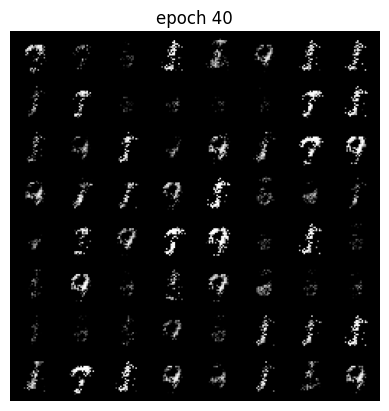

Epoch 40 of 200
Generator loss: 2.07443064, Discriminator loss: 0.78333076


235it [00:10, 21.85it/s]                         


Epoch 41 of 200
Generator loss: 2.17687480, Discriminator loss: 0.75848970


235it [00:10, 22.03it/s]                         


Epoch 42 of 200
Generator loss: 1.82925772, Discriminator loss: 0.84801558


235it [00:10, 21.72it/s]                         


Epoch 43 of 200
Generator loss: 1.73786039, Discriminator loss: 0.90278994


235it [00:10, 21.55it/s]                         


Epoch 44 of 200
Generator loss: 1.94918004, Discriminator loss: 0.83565271


235it [00:10, 21.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


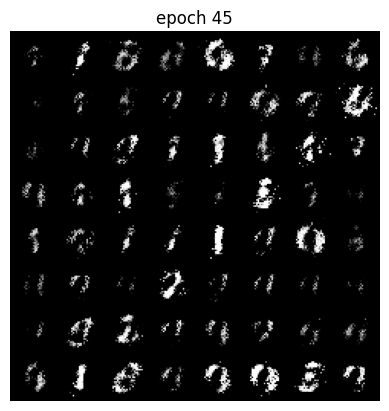

Epoch 45 of 200
Generator loss: 1.77813194, Discriminator loss: 0.84739678


235it [00:11, 20.99it/s]                         


Epoch 46 of 200
Generator loss: 1.80926244, Discriminator loss: 0.85538893


235it [00:11, 20.96it/s]                         


Epoch 47 of 200
Generator loss: 1.86704608, Discriminator loss: 0.80377990


235it [00:11, 20.71it/s]                         


Epoch 48 of 200
Generator loss: 2.10151781, Discriminator loss: 0.86073371


235it [00:11, 20.91it/s]                         


Epoch 49 of 200
Generator loss: 1.79762230, Discriminator loss: 0.89709494


235it [00:11, 20.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


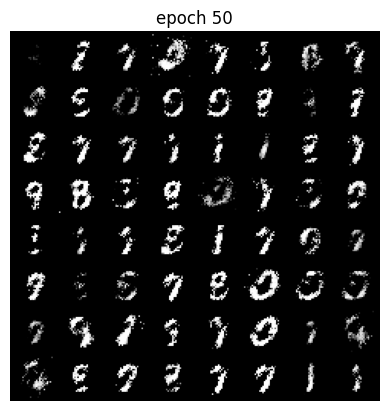

Epoch 50 of 200
Generator loss: 1.92211264, Discriminator loss: 0.85397920


235it [00:10, 21.60it/s]                         


Epoch 51 of 200
Generator loss: 1.80019554, Discriminator loss: 0.88967174


235it [00:10, 21.77it/s]                         


Epoch 52 of 200
Generator loss: 1.95478882, Discriminator loss: 0.78728094


235it [00:10, 21.84it/s]                         


Epoch 53 of 200
Generator loss: 1.73643271, Discriminator loss: 0.91277916


235it [00:10, 21.57it/s]                         


Epoch 54 of 200
Generator loss: 1.71811989, Discriminator loss: 0.91747969


235it [00:10, 21.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


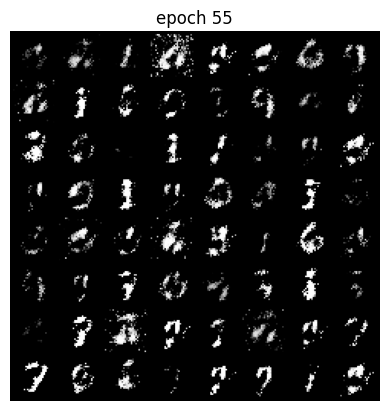

Epoch 55 of 200
Generator loss: 1.64733683, Discriminator loss: 0.92562665


235it [00:10, 21.66it/s]                         


Epoch 56 of 200
Generator loss: 1.74766633, Discriminator loss: 0.90895168


235it [00:10, 21.68it/s]                         


Epoch 57 of 200
Generator loss: 1.72501559, Discriminator loss: 0.91306235


235it [00:10, 21.67it/s]                         


Epoch 58 of 200
Generator loss: 1.95369463, Discriminator loss: 0.82155241


235it [00:10, 21.51it/s]                         


Epoch 59 of 200
Generator loss: 1.93210283, Discriminator loss: 0.80657692


235it [00:11, 21.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


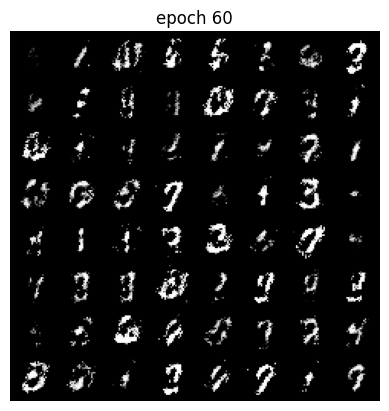

Epoch 60 of 200
Generator loss: 1.72948837, Discriminator loss: 0.88287362


235it [00:10, 21.73it/s]                         


Epoch 61 of 200
Generator loss: 1.67588277, Discriminator loss: 0.91312785


235it [00:10, 21.65it/s]                         


Epoch 62 of 200
Generator loss: 1.70701871, Discriminator loss: 0.90864956


235it [00:10, 21.68it/s]                         


Epoch 63 of 200
Generator loss: 1.57507848, Discriminator loss: 0.96471051


235it [00:10, 21.56it/s]                         


Epoch 64 of 200
Generator loss: 1.54381257, Discriminator loss: 0.95721056


235it [00:10, 21.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


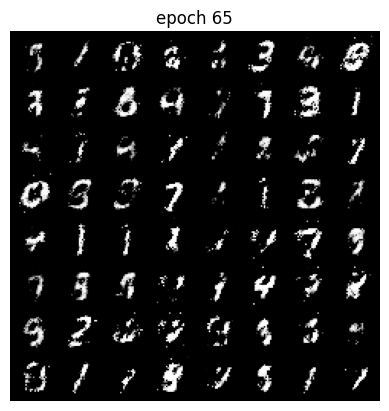

Epoch 65 of 200
Generator loss: 1.58041047, Discriminator loss: 0.95660297


235it [00:11, 21.11it/s]                         


Epoch 66 of 200
Generator loss: 1.44687190, Discriminator loss: 1.01897896


235it [00:10, 21.89it/s]                         


Epoch 67 of 200
Generator loss: 1.42617918, Discriminator loss: 1.01596293


235it [00:10, 21.65it/s]                         


Epoch 68 of 200
Generator loss: 1.47935144, Discriminator loss: 1.00425594


235it [00:10, 21.72it/s]                         


Epoch 69 of 200
Generator loss: 1.50769619, Discriminator loss: 0.99392813


235it [00:10, 21.91it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


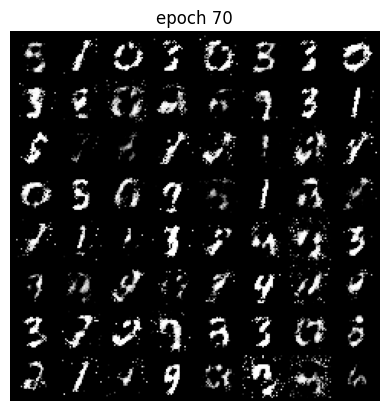

Epoch 70 of 200
Generator loss: 1.44186648, Discriminator loss: 0.99638257


235it [00:10, 21.40it/s]                         


Epoch 71 of 200
Generator loss: 1.44742044, Discriminator loss: 1.02489060


235it [00:10, 21.90it/s]                         


Epoch 72 of 200
Generator loss: 1.44064210, Discriminator loss: 0.99772222


235it [00:10, 22.13it/s]                         


Epoch 73 of 200
Generator loss: 1.44685022, Discriminator loss: 1.01337851


235it [00:11, 21.15it/s]                         


Epoch 74 of 200
Generator loss: 1.42716523, Discriminator loss: 1.01451063


235it [00:10, 21.91it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


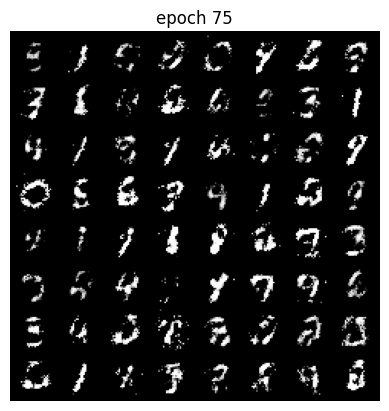

Epoch 75 of 200
Generator loss: 1.45811738, Discriminator loss: 0.99528163


235it [00:10, 21.77it/s]                         


Epoch 76 of 200
Generator loss: 1.46180585, Discriminator loss: 1.00431839


235it [00:10, 21.50it/s]                         


Epoch 77 of 200
Generator loss: 1.38079556, Discriminator loss: 1.02256023


235it [00:10, 21.65it/s]                         


Epoch 78 of 200
Generator loss: 1.37182769, Discriminator loss: 1.04474693


235it [00:10, 21.64it/s]                         


Epoch 79 of 200
Generator loss: 1.39791387, Discriminator loss: 1.03226630


235it [00:10, 21.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


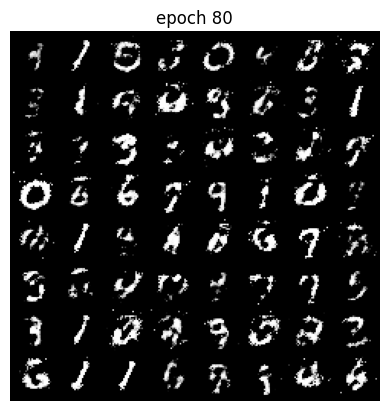

Epoch 80 of 200
Generator loss: 1.36367776, Discriminator loss: 1.04548871


235it [00:10, 21.63it/s]                         


Epoch 81 of 200
Generator loss: 1.44737746, Discriminator loss: 1.01654343


235it [00:10, 21.71it/s]                         


Epoch 82 of 200
Generator loss: 1.39629650, Discriminator loss: 1.03980021


235it [00:10, 21.63it/s]                         


Epoch 83 of 200
Generator loss: 1.44962791, Discriminator loss: 1.00517551


235it [00:10, 21.76it/s]                         


Epoch 84 of 200
Generator loss: 1.42996678, Discriminator loss: 1.01475163


235it [00:11, 21.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


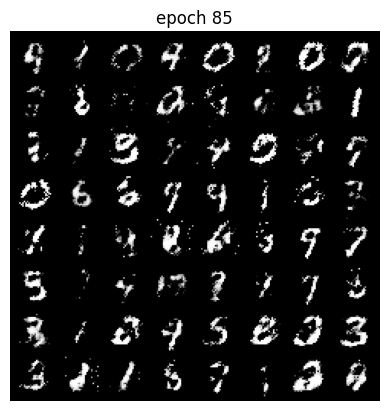

Epoch 85 of 200
Generator loss: 1.31802296, Discriminator loss: 1.06648125


235it [00:10, 21.84it/s]                         


Epoch 86 of 200
Generator loss: 1.24364589, Discriminator loss: 1.09604589


235it [00:10, 21.72it/s]                         


Epoch 87 of 200
Generator loss: 1.29690968, Discriminator loss: 1.08211330


235it [00:10, 21.62it/s]                         


Epoch 88 of 200
Generator loss: 1.24124797, Discriminator loss: 1.08240488


235it [00:10, 21.95it/s]                         


Epoch 89 of 200
Generator loss: 1.32836519, Discriminator loss: 1.08648521


235it [00:10, 21.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


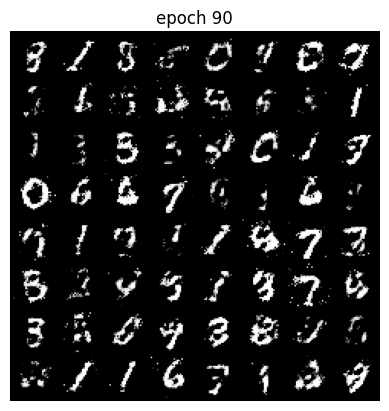

Epoch 90 of 200
Generator loss: 1.21280933, Discriminator loss: 1.11452846


235it [00:10, 21.82it/s]                         


Epoch 91 of 200
Generator loss: 1.22083814, Discriminator loss: 1.09624247


235it [00:10, 21.56it/s]                         


Epoch 92 of 200
Generator loss: 1.28743453, Discriminator loss: 1.08752726


235it [00:10, 21.77it/s]                         


Epoch 93 of 200
Generator loss: 1.29398417, Discriminator loss: 1.07602041


235it [00:10, 21.86it/s]                         


Epoch 94 of 200
Generator loss: 1.28509996, Discriminator loss: 1.07290275


235it [00:10, 22.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


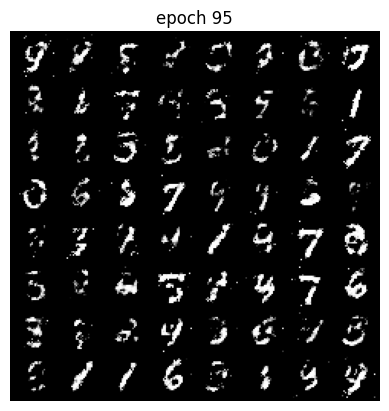

Epoch 95 of 200
Generator loss: 1.27209307, Discriminator loss: 1.08292788


235it [00:10, 21.74it/s]                         


Epoch 96 of 200
Generator loss: 1.22032643, Discriminator loss: 1.12012468


235it [00:10, 21.48it/s]                         


Epoch 97 of 200
Generator loss: 1.26947814, Discriminator loss: 1.09614690


235it [00:10, 22.00it/s]                         


Epoch 98 of 200
Generator loss: 1.20277492, Discriminator loss: 1.13059919


235it [00:10, 21.70it/s]                         


Epoch 99 of 200
Generator loss: 1.25814628, Discriminator loss: 1.11722581


235it [00:10, 21.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


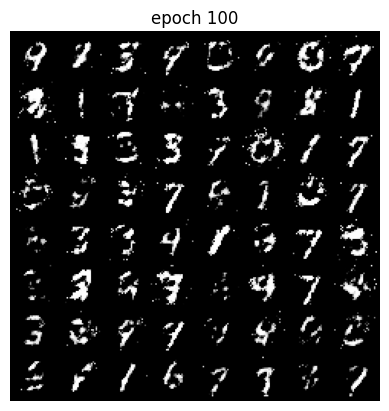

Epoch 100 of 200
Generator loss: 1.24806979, Discriminator loss: 1.09439588


235it [00:10, 21.95it/s]                         


Epoch 101 of 200
Generator loss: 1.28377859, Discriminator loss: 1.08428220


235it [00:10, 21.73it/s]                         


Epoch 102 of 200
Generator loss: 1.33521699, Discriminator loss: 1.06718785


235it [00:10, 21.41it/s]                         


Epoch 103 of 200
Generator loss: 1.39012251, Discriminator loss: 1.03462820


235it [00:10, 21.83it/s]                         


Epoch 104 of 200
Generator loss: 1.33232445, Discriminator loss: 1.05783772


235it [00:10, 21.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


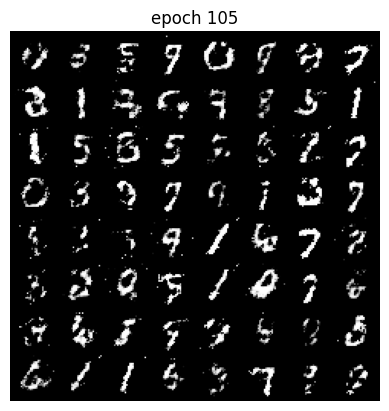

Epoch 105 of 200
Generator loss: 1.25771819, Discriminator loss: 1.07474341


235it [00:10, 21.66it/s]                         


Epoch 106 of 200
Generator loss: 1.24933682, Discriminator loss: 1.09762238


235it [00:10, 21.47it/s]                         


Epoch 107 of 200
Generator loss: 1.27033289, Discriminator loss: 1.09148159


235it [00:10, 21.89it/s]                         


Epoch 108 of 200
Generator loss: 1.28632566, Discriminator loss: 1.07937399


235it [00:11, 21.19it/s]                         


Epoch 109 of 200
Generator loss: 1.20984545, Discriminator loss: 1.10987129


235it [00:10, 21.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


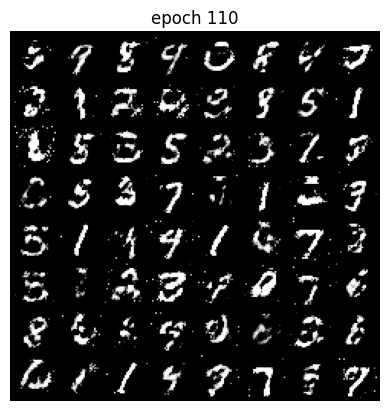

Epoch 110 of 200
Generator loss: 1.23267128, Discriminator loss: 1.10998310


235it [00:10, 21.38it/s]                         


Epoch 111 of 200
Generator loss: 1.23625976, Discriminator loss: 1.11016409


235it [00:10, 21.74it/s]                         


Epoch 112 of 200
Generator loss: 1.22955823, Discriminator loss: 1.09353953


235it [00:10, 21.76it/s]                         


Epoch 113 of 200
Generator loss: 1.24369641, Discriminator loss: 1.09955172


235it [00:10, 21.83it/s]                         


Epoch 114 of 200
Generator loss: 1.18558910, Discriminator loss: 1.11322510


235it [00:11, 21.26it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


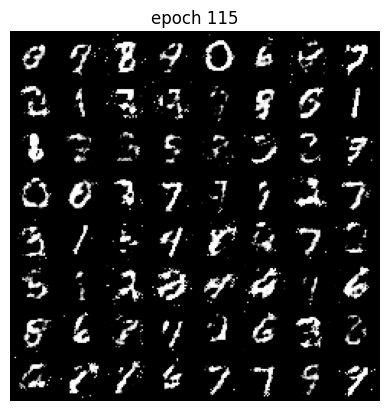

Epoch 115 of 200
Generator loss: 1.17642233, Discriminator loss: 1.12581172


235it [00:11, 19.71it/s]                         


Epoch 116 of 200
Generator loss: 1.16676001, Discriminator loss: 1.14834008


235it [00:11, 19.80it/s]                         


Epoch 117 of 200
Generator loss: 1.15750624, Discriminator loss: 1.13346666


235it [00:12, 18.93it/s]                         


Epoch 118 of 200
Generator loss: 1.17639674, Discriminator loss: 1.14909678


235it [00:11, 19.68it/s]                         


Epoch 119 of 200
Generator loss: 1.14857727, Discriminator loss: 1.13944904


235it [00:12, 18.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


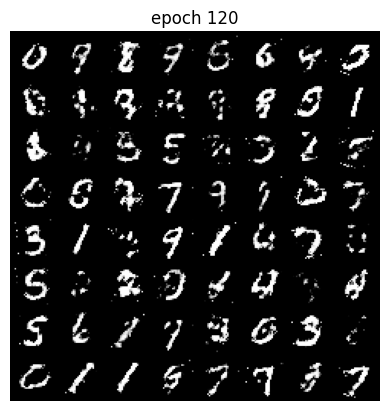

Epoch 120 of 200
Generator loss: 1.17086270, Discriminator loss: 1.13904163


235it [00:12, 19.44it/s]                         


Epoch 121 of 200
Generator loss: 1.12848666, Discriminator loss: 1.15088491


235it [00:12, 19.09it/s]                         


Epoch 122 of 200
Generator loss: 1.13084638, Discriminator loss: 1.15674059


235it [00:12, 19.08it/s]                         


Epoch 123 of 200
Generator loss: 1.12695897, Discriminator loss: 1.15555355


235it [00:12, 19.06it/s]                         


Epoch 124 of 200
Generator loss: 1.07145033, Discriminator loss: 1.17595654


235it [00:12, 19.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


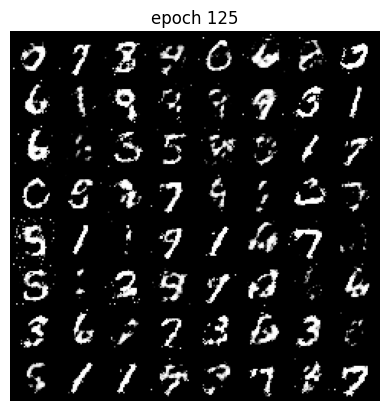

Epoch 125 of 200
Generator loss: 1.10059872, Discriminator loss: 1.17679720


235it [00:11, 19.82it/s]                         


Epoch 126 of 200
Generator loss: 1.11043657, Discriminator loss: 1.16865297


235it [00:11, 19.72it/s]                         


Epoch 127 of 200
Generator loss: 1.13590299, Discriminator loss: 1.15687642


235it [00:12, 19.13it/s]                         


Epoch 128 of 200
Generator loss: 1.12850989, Discriminator loss: 1.16883771


235it [00:12, 19.00it/s]                         


Epoch 129 of 200
Generator loss: 1.11579473, Discriminator loss: 1.16240548


235it [00:12, 19.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


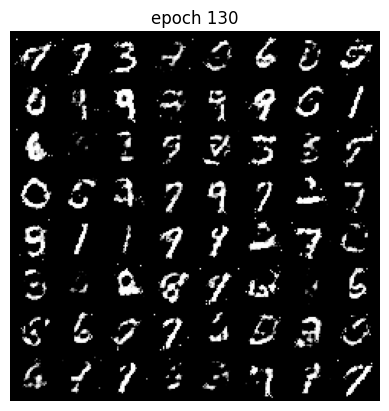

Epoch 130 of 200
Generator loss: 1.14721452, Discriminator loss: 1.14676820


235it [00:12, 19.24it/s]                         


Epoch 131 of 200
Generator loss: 1.13630357, Discriminator loss: 1.15000280


235it [00:12, 18.65it/s]                         


Epoch 132 of 200
Generator loss: 1.13442772, Discriminator loss: 1.16128794


235it [00:11, 19.85it/s]                         


Epoch 133 of 200
Generator loss: 1.11521125, Discriminator loss: 1.15994748


235it [00:12, 19.08it/s]                         


Epoch 134 of 200
Generator loss: 1.12661933, Discriminator loss: 1.16629738


235it [00:12, 19.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


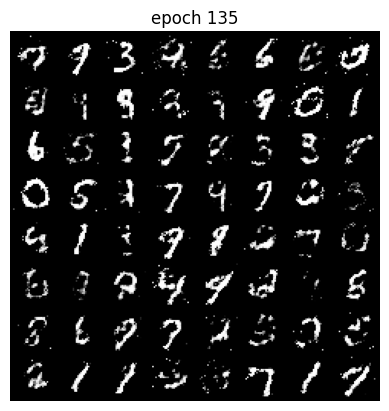

Epoch 135 of 200
Generator loss: 1.09225802, Discriminator loss: 1.18837243


235it [00:12, 19.35it/s]                         


Epoch 136 of 200
Generator loss: 1.11519851, Discriminator loss: 1.15985787


235it [00:11, 19.61it/s]                         


Epoch 137 of 200
Generator loss: 1.10681337, Discriminator loss: 1.16555563


235it [00:11, 19.65it/s]                         


Epoch 138 of 200
Generator loss: 1.15387312, Discriminator loss: 1.14681580


235it [00:12, 18.93it/s]                         


Epoch 139 of 200
Generator loss: 1.12641988, Discriminator loss: 1.16304148


235it [00:11, 19.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


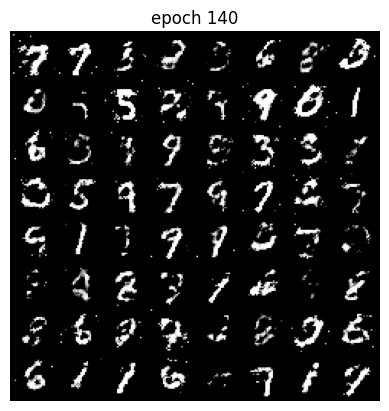

Epoch 140 of 200
Generator loss: 1.12556976, Discriminator loss: 1.15987983


235it [00:12, 19.09it/s]                         


Epoch 141 of 200
Generator loss: 1.12678454, Discriminator loss: 1.15638360


235it [00:12, 19.04it/s]                         


Epoch 142 of 200
Generator loss: 1.10718798, Discriminator loss: 1.16319617


235it [00:12, 19.37it/s]                         


Epoch 143 of 200
Generator loss: 1.07813863, Discriminator loss: 1.18026908


235it [00:12, 19.23it/s]                         


Epoch 144 of 200
Generator loss: 1.07782774, Discriminator loss: 1.18759342


235it [00:12, 19.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


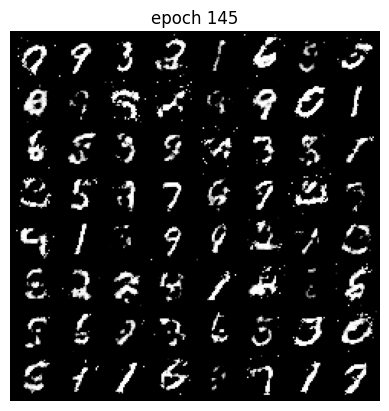

Epoch 145 of 200
Generator loss: 1.10870931, Discriminator loss: 1.17154682


235it [00:11, 20.17it/s]                         


Epoch 146 of 200
Generator loss: 1.10772356, Discriminator loss: 1.17192748


235it [00:11, 19.94it/s]                         


Epoch 147 of 200
Generator loss: 1.08251935, Discriminator loss: 1.18291456


235it [00:12, 19.33it/s]                         


Epoch 148 of 200
Generator loss: 1.05728601, Discriminator loss: 1.19420855


235it [00:11, 20.11it/s]                         


Epoch 149 of 200
Generator loss: 1.07567001, Discriminator loss: 1.19198382


235it [00:11, 20.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


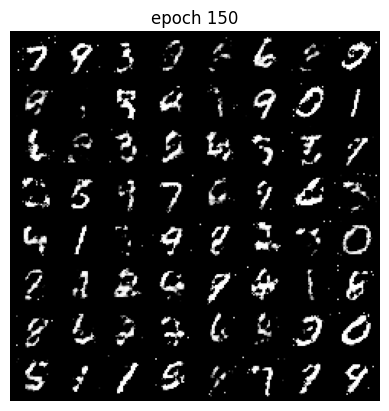

Epoch 150 of 200
Generator loss: 1.08879517, Discriminator loss: 1.17587789


235it [00:11, 19.94it/s]                         


Epoch 151 of 200
Generator loss: 1.10840638, Discriminator loss: 1.16673475


235it [00:10, 21.45it/s]                         


Epoch 152 of 200
Generator loss: 1.05995012, Discriminator loss: 1.19203102


235it [00:11, 20.31it/s]                         


Epoch 153 of 200
Generator loss: 1.05526663, Discriminator loss: 1.19890263


235it [00:11, 20.54it/s]                         


Epoch 154 of 200
Generator loss: 1.04146277, Discriminator loss: 1.20259676


235it [00:12, 18.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


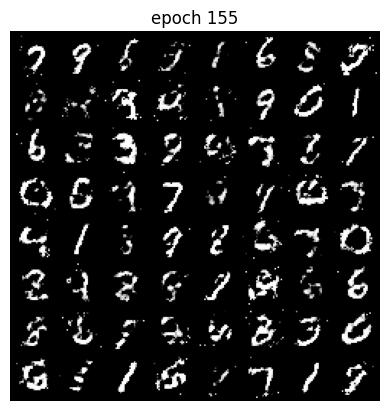

Epoch 155 of 200
Generator loss: 1.04339762, Discriminator loss: 1.20573703


235it [00:12, 19.22it/s]                         


Epoch 156 of 200
Generator loss: 1.03686116, Discriminator loss: 1.21210172


235it [00:12, 19.20it/s]                         


Epoch 157 of 200
Generator loss: 1.03522934, Discriminator loss: 1.20929388


235it [00:11, 20.71it/s]                         


Epoch 158 of 200
Generator loss: 1.02599074, Discriminator loss: 1.21402161


235it [00:11, 20.83it/s]                         


Epoch 159 of 200
Generator loss: 1.03898867, Discriminator loss: 1.20127238


235it [00:11, 21.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


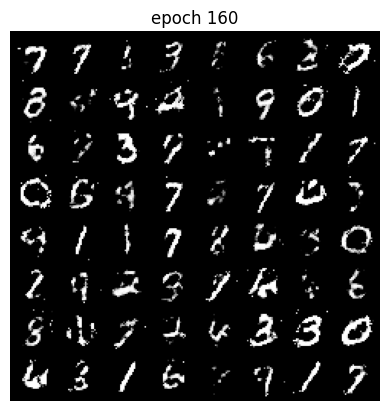

Epoch 160 of 200
Generator loss: 1.03708769, Discriminator loss: 1.20572920


235it [00:11, 19.77it/s]                         


Epoch 161 of 200
Generator loss: 1.04235337, Discriminator loss: 1.20214962


235it [00:11, 21.33it/s]                         


Epoch 162 of 200
Generator loss: 1.08125197, Discriminator loss: 1.19188307


235it [00:11, 20.68it/s]                         


Epoch 163 of 200
Generator loss: 1.02685711, Discriminator loss: 1.21308403


235it [00:11, 20.93it/s]                         


Epoch 164 of 200
Generator loss: 1.04964970, Discriminator loss: 1.20630729


235it [00:11, 20.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


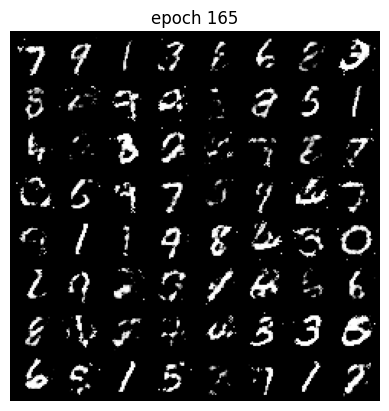

Epoch 165 of 200
Generator loss: 1.04355994, Discriminator loss: 1.20534992


235it [00:10, 22.17it/s]                         


Epoch 166 of 200
Generator loss: 1.05669172, Discriminator loss: 1.19948974


235it [00:10, 21.58it/s]                         


Epoch 167 of 200
Generator loss: 1.07945267, Discriminator loss: 1.19155421


235it [00:10, 21.86it/s]                         


Epoch 168 of 200
Generator loss: 1.08562466, Discriminator loss: 1.18480965


235it [00:11, 21.18it/s]                         


Epoch 169 of 200
Generator loss: 1.07047490, Discriminator loss: 1.19374793


235it [00:10, 21.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


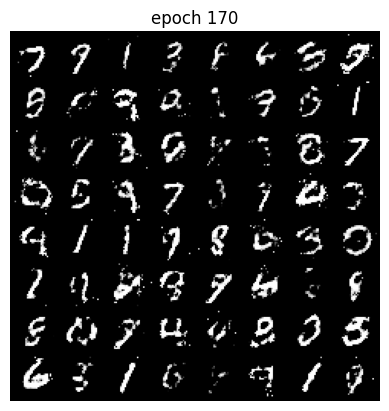

Epoch 170 of 200
Generator loss: 1.06885670, Discriminator loss: 1.19019529


235it [00:10, 21.45it/s]                         


Epoch 171 of 200
Generator loss: 1.04579978, Discriminator loss: 1.20024547


235it [00:10, 21.80it/s]                         


Epoch 172 of 200
Generator loss: 1.02076009, Discriminator loss: 1.21159330


235it [00:11, 21.35it/s]                         


Epoch 173 of 200
Generator loss: 1.01638241, Discriminator loss: 1.21602013


235it [00:10, 21.87it/s]                         


Epoch 174 of 200
Generator loss: 1.01986840, Discriminator loss: 1.21777818


235it [00:10, 21.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


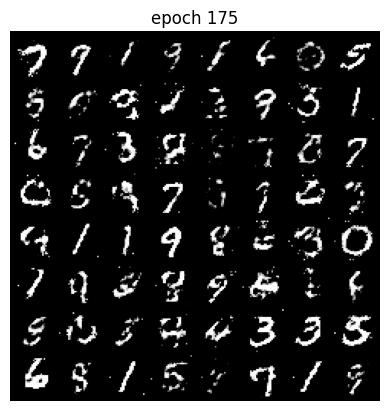

Epoch 175 of 200
Generator loss: 1.00706326, Discriminator loss: 1.22490016


235it [00:10, 21.85it/s]                         


Epoch 176 of 200
Generator loss: 0.98710339, Discriminator loss: 1.23971622


235it [00:11, 20.81it/s]                         


Epoch 177 of 200
Generator loss: 0.98693830, Discriminator loss: 1.23512777


235it [00:10, 21.63it/s]                         


Epoch 178 of 200
Generator loss: 0.99785623, Discriminator loss: 1.22235609


235it [00:11, 21.19it/s]                         


Epoch 179 of 200
Generator loss: 0.98124477, Discriminator loss: 1.24238949


235it [00:10, 21.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


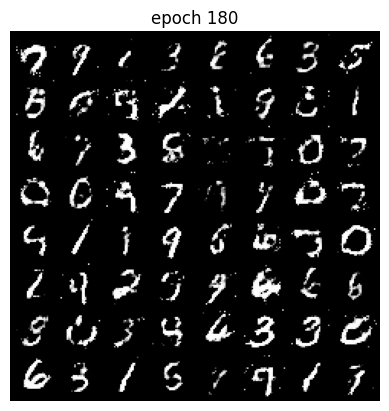

Epoch 180 of 200
Generator loss: 1.03400023, Discriminator loss: 1.21337394


235it [00:11, 21.22it/s]                         


Epoch 181 of 200
Generator loss: 0.99208345, Discriminator loss: 1.23349823


235it [00:10, 21.47it/s]                         


Epoch 182 of 200
Generator loss: 0.99580801, Discriminator loss: 1.23361356


235it [00:11, 20.83it/s]                         


Epoch 183 of 200
Generator loss: 1.00276340, Discriminator loss: 1.22632326


235it [00:11, 20.99it/s]                         


Epoch 184 of 200
Generator loss: 1.03009155, Discriminator loss: 1.22950584


235it [00:10, 21.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


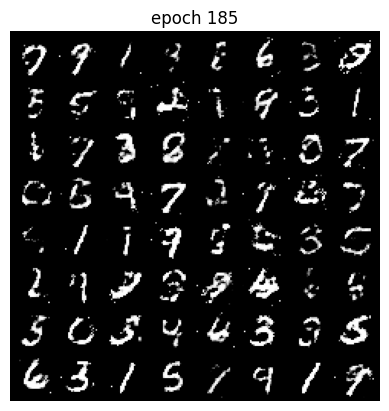

Epoch 185 of 200
Generator loss: 1.00210278, Discriminator loss: 1.23108426


235it [00:11, 20.96it/s]                         


Epoch 186 of 200
Generator loss: 1.00380470, Discriminator loss: 1.22879092


235it [00:11, 20.68it/s]                         


Epoch 187 of 200
Generator loss: 1.00782486, Discriminator loss: 1.22988455


235it [00:10, 21.99it/s]                         


Epoch 188 of 200
Generator loss: 0.99881356, Discriminator loss: 1.23975460


235it [00:10, 21.47it/s]                         


Epoch 189 of 200
Generator loss: 1.01498471, Discriminator loss: 1.22688991


235it [00:10, 21.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


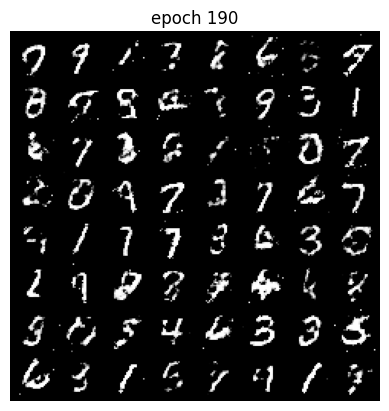

Epoch 190 of 200
Generator loss: 1.01194939, Discriminator loss: 1.22620637


235it [00:11, 19.93it/s]                         


Epoch 191 of 200
Generator loss: 1.00755447, Discriminator loss: 1.22733868


235it [00:11, 21.19it/s]                         


Epoch 192 of 200
Generator loss: 1.01906178, Discriminator loss: 1.23436499


235it [00:11, 20.31it/s]                         


Epoch 193 of 200
Generator loss: 1.01479147, Discriminator loss: 1.22532822


235it [00:11, 20.08it/s]                         


Epoch 194 of 200
Generator loss: 1.02215508, Discriminator loss: 1.21658323


235it [00:11, 20.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


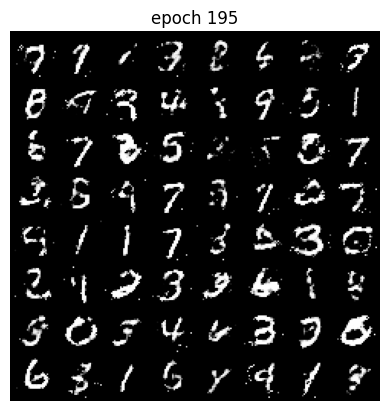

Epoch 195 of 200
Generator loss: 1.01539644, Discriminator loss: 1.22290998


235it [00:11, 21.34it/s]                         


Epoch 196 of 200
Generator loss: 0.97983069, Discriminator loss: 1.24076259


235it [00:11, 20.51it/s]                         


Epoch 197 of 200
Generator loss: 1.02677153, Discriminator loss: 1.21680286


235it [00:11, 20.96it/s]                         


Epoch 198 of 200
Generator loss: 0.98132413, Discriminator loss: 1.23971704


235it [00:11, 21.08it/s]                         


Epoch 199 of 200
Generator loss: 0.98948659, Discriminator loss: 1.23268828


235it [00:10, 21.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


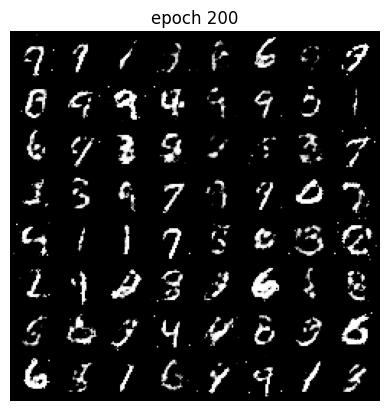

Epoch 200 of 200
Generator loss: 0.97634090, Discriminator loss: 1.23786476


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    output = output.view(-1, 1)
    return criterion(output, true_label)
    
    
def discriminator_loss(output, true_label):
    output = output.view(-1, 1)
    return criterion(output, true_label)
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        real, _ = data
        real = real.to(device)
        # add noise to real data for smoothing
        noisy_real = real + torch.randn_like(real) * 0.1
        # clamp data to stay in range
        noisy_real = torch.clamp(noisy_real, 0, 1)

        b_size = len(real)
        train_noise = create_noise(b_size, nz)
        fake = generator(train_noise)

        real_label = label_real(b_size)
        fake_label = label_fake(b_size)
        
        # === TRAIN DISCRIMINATOR ===

        # Pass real images
        output = discriminator(real).view(-1)
        d_loss = discriminator_loss(output, real_label)

        # Pass fake images
        output = discriminator(fake.detach()).view(-1)
        d_loss += discriminator_loss(output, fake_label)

        # Backpropagation
        discriminator.zero_grad()
        d_loss.backward()
        optim_d.step()

        # === TRAIN GENERATOR ===

        output = discriminator(fake).view(-1)
        g_loss = generator_loss(output, real_label)
        #g_loss = torch.mean(torch.log(1 - output)) # alternate loss (for descent)

        # Backpropagation
        generator.zero_grad()
        g_loss.backward()
        optim_g.step()
        

        # Add new losses
        loss_g += g_loss.item()
        loss_d += d_loss.item()

    # Update learning rates
    # scheduler_d.step()
    # scheduler_g.step()
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

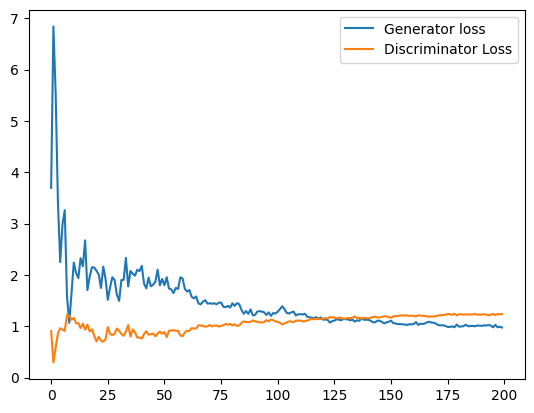

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')